In [1]:
import pandas as pd
import numpy as np
import pickle
from pandas_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import sklearn
import matplotlib.pyplot as plt
from sklearn import tree
%matplotlib inline
from sklearn.ensemble import BaggingClassifier
from sklearn


In [45]:
df = pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [46]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
x = df.drop(columns=['quality'])

In [5]:
y = df.quality

In [6]:
from sklearn.ensemble import BaggingClassifier

In [7]:
x_train, x_test, y_train, y_test=train_test_split(x,y, random_state=0)

In [8]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100)

In [9]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100)

In [10]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 4, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 6, 6, 6, 5, 7, 7, 5, 6, 6, 6, 5, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 7, 5, 7, 6, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 5, 7, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 8, 6, 5, 5, 6, 7, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       5, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 7, 6, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [11]:
bag_dt.base_estimator

DecisionTreeClassifier()

In [12]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [13]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [14]:
bag_dt.estimator_params

()

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6), n_estimators=10)

In [17]:
bag_knn.fit(x_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [18]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 7, 6, 5, 6, 6, 6, 6, 7, 6, 5,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5,
       6, 7, 8, 7, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 5, 4, 6, 6, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 6, 6, 6, 5, 6, 5, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 6, 6, 5, 7, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       7, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 7, 6, 7, 6, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 6, 7, 5, 6, 7, 6, 6, 5, 7, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=5)

In [21]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [22]:
rf.predict(x_test)

array([6, 5, 7, 5, 5, 6, 5, 6, 4, 5, 6, 5, 6, 5, 6, 7, 7, 6, 5, 5, 6, 5,
       6, 5, 5, 5, 5, 7, 5, 6, 6, 5, 5, 5, 7, 7, 6, 5, 6, 6, 6, 6, 6, 7,
       6, 5, 5, 6, 5, 6, 5, 4, 6, 6, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 7, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 7, 5, 5, 5, 7, 6, 6, 7, 5, 5, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 6, 5, 7, 6, 6, 5, 5, 5, 5, 5, 7, 5, 5, 5, 6, 5, 5,
       4, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 5, 7, 5, 7,
       5, 6, 7, 5, 5, 7, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 7, 6, 5, 5,
       5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 5, 6, 6, 6,
       5, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 5, 7, 5, 5, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 6,

In [23]:
rf.score(x_test, y_test)

0.6575

In [24]:
bag_dt.score(x_test, y_test)

0.6875

In [25]:
bag_knn.score(x_test,y_test)

0.5025

In [26]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=2016892223),
 DecisionTreeClassifier(max_features='auto', random_state=1900509728),
 DecisionTreeClassifier(max_features='auto', random_state=518858542),
 DecisionTreeClassifier(max_features='auto', random_state=423237021),
 DecisionTreeClassifier(max_features='auto', random_state=1565163128)]

In [27]:
rf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2016892223)

[Text(639.8423423062115, 1061.3142857142857, 'X[6] <= 62.5\ngini = 0.652\nsamples = 767\nvalue = [12, 41, 495, 478, 159, 14]'),
 Text(354.5304238321355, 1009.5428571428572, 'X[7] <= 0.996\ngini = 0.666\nsamples = 570\nvalue = [12, 36, 297, 395, 138, 13]'),
 Text(111.89360882956879, 957.7714285714286, 'X[10] <= 10.05\ngini = 0.708\nsamples = 195\nvalue = [3, 17, 76, 121, 80, 8]'),
 Text(38.95687885010267, 906.0, 'X[10] <= 9.075\ngini = 0.513\nsamples = 29\nvalue = [1, 7, 31, 8, 0, 0]'),
 Text(34.37371663244353, 854.2285714285715, 'gini = 0.0\nsamples = 2\nvalue = [0, 5, 0, 0, 0, 0]'),
 Text(43.540041067761805, 854.2285714285715, 'X[9] <= 0.66\ngini = 0.416\nsamples = 27\nvalue = [1, 2, 31, 8, 0, 0]'),
 Text(38.95687885010267, 802.4571428571429, 'X[2] <= 0.235\ngini = 0.348\nsamples = 25\nvalue = [1, 2, 31, 5, 0, 0]'),
 Text(27.498973305954827, 750.6857142857143, 'X[7] <= 0.996\ngini = 0.245\nsamples = 23\nvalue = [1, 0, 31, 4, 0, 0]'),
 Text(18.33264887063655, 698.9142857142858, 'X[1] <

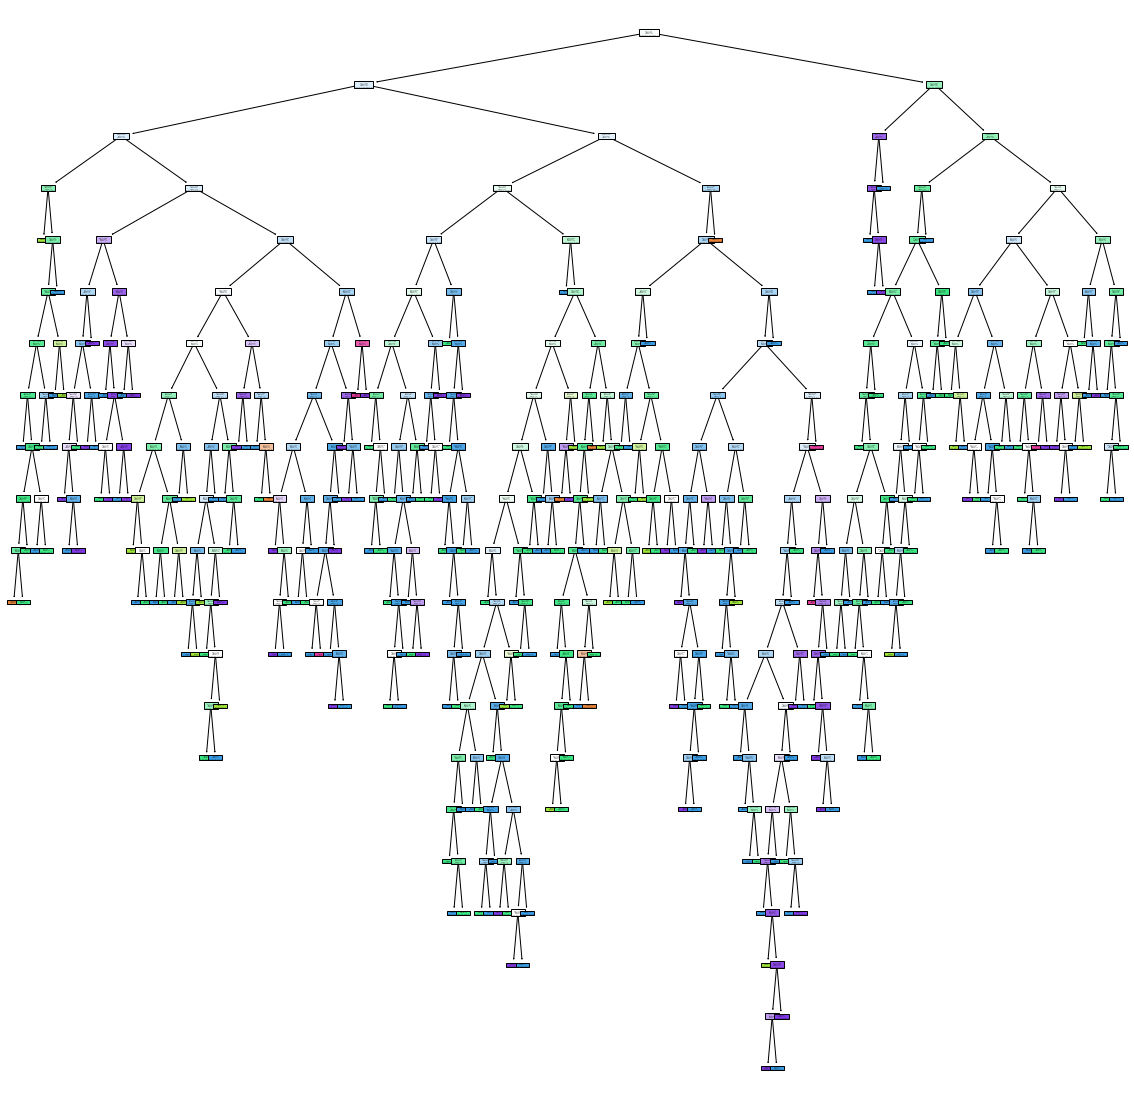

In [28]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0], filled=True)

[Text(665.1325201760822, 1062.490909090909, 'X[2] <= 0.315\ngini = 0.65\nsamples = 764\nvalue = [13, 48, 503, 474, 152, 9]'),
 Text(374.36252751283934, 1013.0727272727273, 'X[10] <= 10.35\ngini = 0.615\nsamples = 466\nvalue = [13, 38, 333, 306, 42, 3]'),
 Text(154.30630961115187, 963.6545454545455, 'X[1] <= 0.465\ngini = 0.53\nsamples = 291\nvalue = [9, 20, 279, 145, 7, 0]'),
 Text(55.677182685253115, 914.2363636363636, 'X[5] <= 26.5\ngini = 0.514\nsamples = 46\nvalue = [0, 0, 26, 42, 3, 0]'),
 Text(41.48495964783566, 864.8181818181819, 'X[8] <= 3.635\ngini = 0.47\nsamples = 33\nvalue = [0, 0, 15, 37, 3, 0]'),
 Text(37.11812179016874, 815.4000000000001, 'X[8] <= 3.375\ngini = 0.437\nsamples = 32\nvalue = [0, 0, 12, 37, 3, 0]'),
 Text(21.834189288334557, 765.9818181818182, 'X[7] <= 0.997\ngini = 0.533\nsamples = 21\nvalue = [0, 0, 12, 19, 2, 0]'),
 Text(13.100513573000732, 716.5636363636363, 'X[4] <= 0.079\ngini = 0.459\nsamples = 11\nvalue = [0, 0, 9, 5, 0, 0]'),
 Text(8.73367571533382

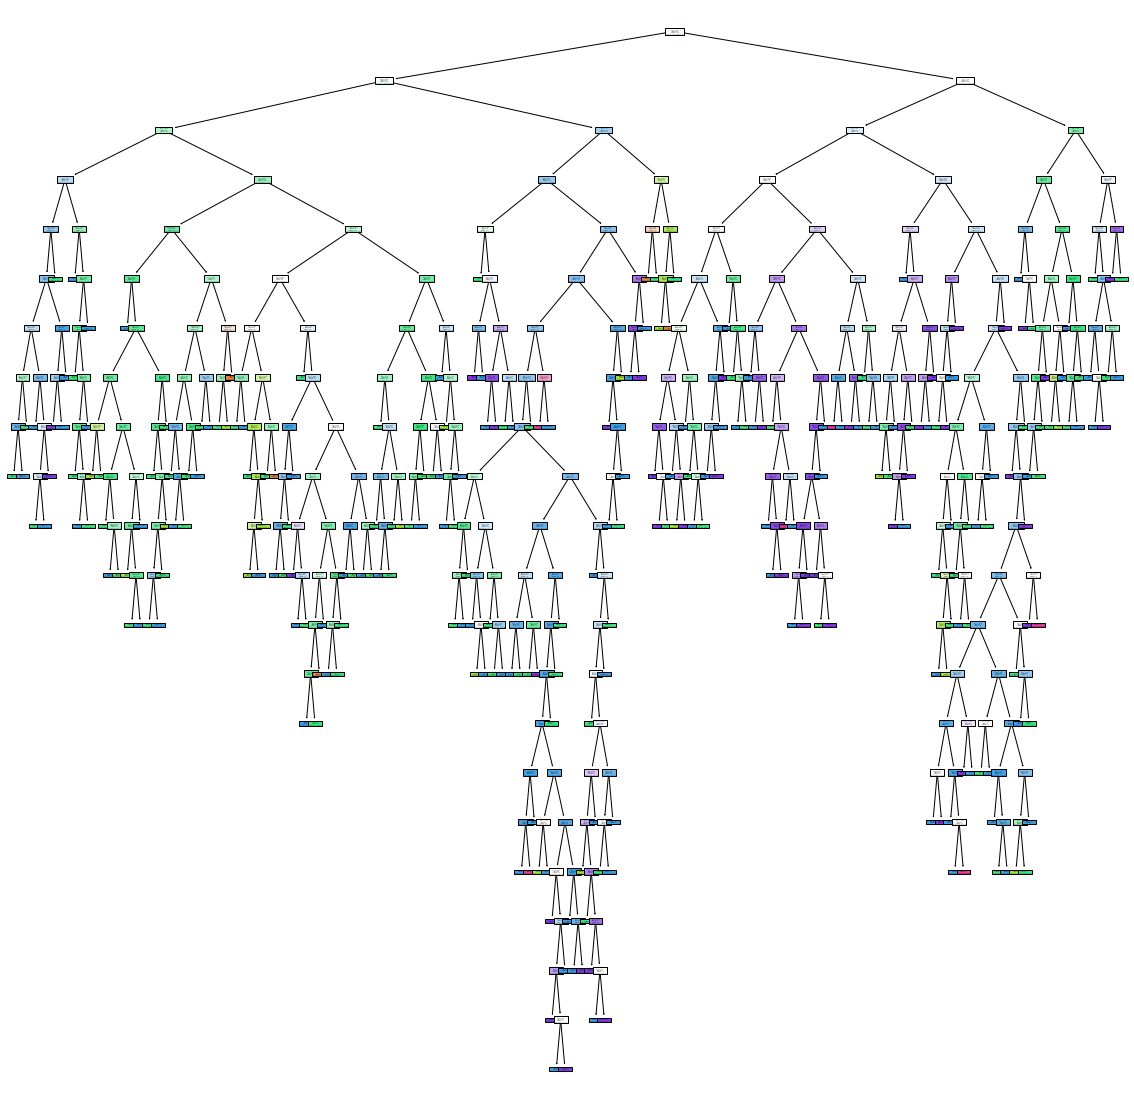

In [29]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1], filled=True)

In [ ]:
for i in rf.estimators_:
    plt.figure(figsize=(20,20))
    tree.plot_tree(i, filled=True)

In [34]:
grid_param = {
    "n_estimators" : [5,10,15,20],
    "criterion" : ["gini", "entropy"],
    "max_depth" : range(10),
    "min_samples_leaf" : range(10)
    
}

In [32]:
grid_search_rf=GridSearchCV(param_grid= grid_param, cv=10, n_jobs=-1, verbose=1,estimator=rf )

In [33]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Delll\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
        nan        nan 0.55294118 0.54129552 0.54464986 0.55714986
 0.54380252 0.5554972  0.56213585 0.55628151 0.53541317 0.54379552
 0.53794818 0.

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20]},
             verbose=1)

In [35]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 20}

In [39]:
rf_new = RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,n_estimators=20 )

In [40]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, min_samples_leaf=2,
                       n_estimators=20)

In [41]:
rf_new.score(x_test,y_test)

0.6625